<a href="https://colab.research.google.com/github/RamiroCabri1/CabriRamiro/blob/main/ProyectoMLSpotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Laboratorio**

##**Clasificador de canciones de Spotify**





Introducción

En este laboratorio, nos enfocaremos en un conjunto de datos repleto de atributos clave de
distintas canciones. La meta es establecer a través de herramientas de aprendizaje
automático, un clasificador que pueda predecir las inclinaciones musicales de un individuo y
predecir si disfrutará o no de una determinada canción.
Conjunto de datos

Se proporcionará un archivo en formato CSV que alberga un conjunto de datos con 16
columnas. De estas, 13 representan atributos específicos de las canciones. Además, se
incluyen columnas dedicadas al nombre de la canción y al artista respectivamente. La
columna "destino" actúa como etiqueta, indicando las preferencias del usuario: un valor de
"1" significa que la canción fue del agrado del usuario, mientras que un "0" indica lo
contrario. Los atributos que caracterizan cada pista son:
1. Danceability (Bailabilidad): Describe cuán adecuada es una pista para bailar basada en
una combinación de elementos musicales, incluyendo el tempo, la estabilidad del ritmo y la
fuerza del ritmo. Una puntuación de 0.0 es menos bailable y 1.0 es más bailable.
2. Energy (Energía): Representa una medida perceptiva de intensidad y actividad. Las
pistas con mucha energía suelen sentirse rápidas, ruidosas y rítmicas. Por ejemplo, el death
metal tiene alta energía, mientras que un preludio de Bach tiene una puntuación baja en el
espectro de energía.
3. Loudness (Volumen): Es una medida general de la sonoridad de una pista en decibeles
(dB). Las pistas sonoras tienen un valor promedio más alto.
4. Speechiness (Hablado): Detecta la presencia de palabras habladas en una pista. Los
valores más cercanos a 1.0 sugieren que la pista contiene más palabras habladas, valores
por encima de 0.66 describen pistas que son probablemente hechas completamente de
palabras habladas. Los valores entre 0.33 y 0.66 describen pistas que pueden contener
música y palabras. Valores por debajo de 0.33 sugieren música o pistas no habladas.
5. Acousticness (Acústica): Una medida de cuán acústica es una pista. Una puntuación
de 1.0 significa que es muy probable que la pista sea acústica.
6. Instrumentalness (Instrumentalidad): Predice si una pista no contiene voces. Los
valores más cercanos a 1.0 significan que es muy probable que la pista sea instrumental,
mientras que valores cercanos a 0.5 indican que la pista puede contener contenido vocal.
7. Liveness (En vivo): Detecta la presencia de una audiencia en la grabación. Valores más
altos representan una mayor probabilidad de que la pista haya sido interpretada en vivo. Un
valor por encima de 0.8 proporciona una gran probabilidad de que la pista esté en vivo.
8. Valence (Valencia): Describe la positividad musical transmitida por una pista. Las pistas
con alta valencia suenan más positivas (por ejemplo, feliz, alegre, eufórico), mientras que
las pistas con baja valencia suenan más negativas (por ejemplo, triste, deprimido, enojado).
9. Tempo: Es la velocidad general o ritmo de una pista y se deriva directamente de la
duración promedio de la barra. Se mide en pulsos por minuto (BPM).


##Informe

Se debe desarrollar un programa que categorice canciones según las preferencias del
usuario. La tarea principal es crear un programa capaz de predecir si una canción podría ser
del gusto del usuario o no. Este proyecto debe ser ejecutado dentro de un Notebook de
Colab.
Dentro del Notebook, es importante que cada paso del proceso esté acompañado por
bloques de texto que expliquen el razonamiento detrás de las decisiones tomadas. Se debe
detallar por qué se eligieron ciertas técnicas, métodos o parámetros y cuál es su relevancia
en el contexto del proyecto. Además, es necesario documentar los desafíos o
inconvenientes que surgieron durante el desarrollo, proporcionando una visión clara y
completa del proceso de diseño e implementación de la solución.

##Flujo de Trabajo

Elegir las características óptimas para el entrenamiento de los modelos
Separar en datos de entrenamiento y datos de prueba
###Realizar varios modelos de Machine Learning:
● KNN (K-Nearest Neighbors)
● SVM (Support Vector Machines)
● Árbol de decisión
● Bayes (Naive Bayes)
● Otro modelo que crean conveniente
###Realizar algún tipo de validación:
● Validación Simple
● Validación Cruzada k-fold
###Evaluación y análisis del rendimiento de cada modelo:
● Matriz de confusión
● Precisión, recall y F1-score
###Ajustar para cada uno de los modelos los hiper parámetros:
● Grid Search
● Random Search
###Realizar un ensamble de los modelos:
● Votación Mayoritaria
##Evaluación y análisis del rendimiento:
● Matriz de confusión
● Precisión, recall y F1-scor

#Librerias y Dataset

In [162]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import glob
import plotly.graph_objects as go
import os
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.metrics import  precision_score, recall_score, f1_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn import tree
import graphviz
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import  classification_report
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import VotingClassifier

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [163]:
path = r'/content/drive/MyDrive/DataAnalisis/Proyecto2/Canciones_Spotify.csv'
df_spoty = pd.read_csv(path)
df_spoty = df_spoty.dropna()
df_spoty

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,2012,0.00106,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.3330,74.976,4.0,0.211,0,Like A Bitch - Kill The Noise Remix,Kill The Noise
2013,2013,0.08770,0.894,182182,0.892,0.001670,1,0.0528,-2.663,1,0.1310,110.041,4.0,0.867,0,Candy,Dillon Francis
2014,2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.1070,150.082,4.0,0.470,0,Habit - Dack Janiels & Wenzday Remix,Rain Man
2015,2015,0.00164,0.557,185600,0.992,0.677000,1,0.0913,-2.735,1,0.1330,150.011,4.0,0.623,0,First Contact,Twin Moons


#KNN
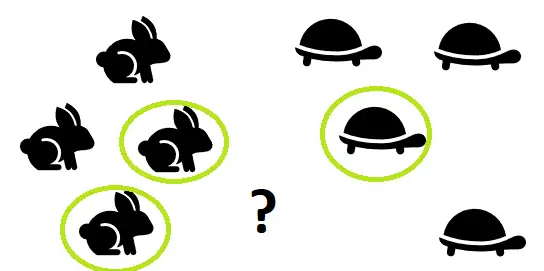

## Armado de modelo.

In [164]:



# Con estos atributos del df configuro el modelo.

x= df_spoty[['instrumentalness','energy','loudness','speechiness','liveness','acousticness']]
y= df_spoty[['target']]

# Particion de Train y Test, con un tamaño de test de 0.5

X_train, X_test, y_train, y_test= train_test_split(x, y, test_size= 0.5, random_state=42)

# Creo el modelo y lo pongo a entrenar

clasificadorKNN = KNeighborsClassifier(n_neighbors=9)
clasificadorKNN.fit(X_train, y_train.values.ravel())

# Obtengo las predicciones con la funcion .predict, pasando como argumento los vales tomados para el testeo. Como resultado tengo los target predichos.

y_pred = clasificadorKNN.predict(X_test)








array_1d = y.values.ravel()



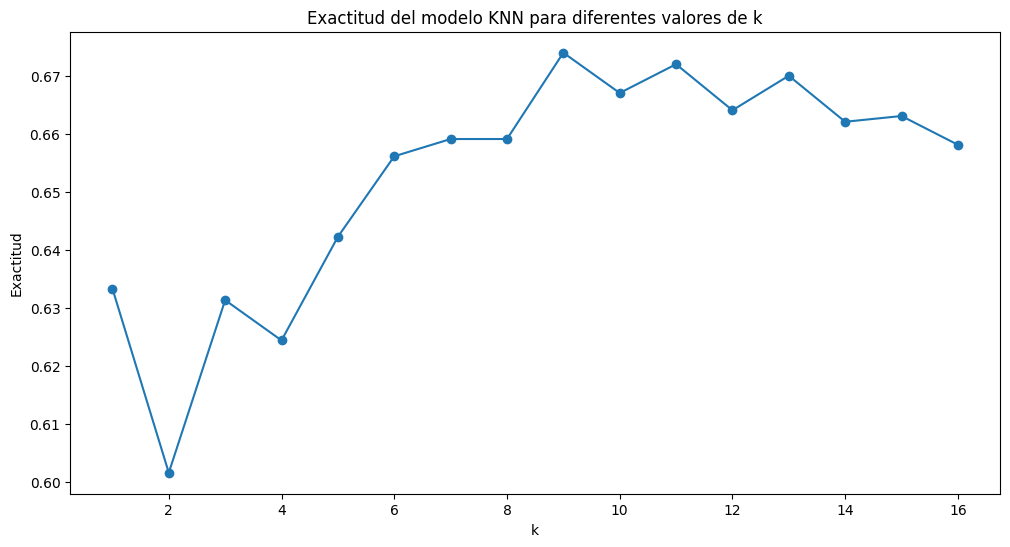

In [165]:
# Esta funcion me sirve para poder ver que valor de k seria el mas apropiado para el modelo.
# El mejor resultado de accuracy encontrado con los vectores que elegi para el modelo es un k de 9 y un valor de muestra de 0.5

def plot_knn_metrics(x, y, model, metric, test_size=0.5):

    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=42)

    # Inicializa las listas para almacenar los resultados
    k_values = list(range(1, 17))
    scores = []

    # Para cada valor de k, entrena un modelo y calcula la precisión
    for k in k_values:
        # Crea y entrena el modelo
        clf = model(n_neighbors=k)
        clf.fit(X_train, y_train.values.ravel())

        # Predicciones en el conjunto de prueba
        y_pred = clf.predict(X_test)

        # Calcula la precisión y la almacena
        score = accuracy_score(y_test, y_pred)
        scores.append(score)


    # Grafica los resultados
    plt.figure(figsize=(12, 6))
    plt.plot(k_values, scores, marker='o')
    plt.title('Exactitud del modelo KNN para diferentes valores de k')
    plt.xlabel('k')
    plt.ylabel('Exactitud')
    plt.show()

plot_knn_metrics(x, y, KNeighborsClassifier,'accuracy', test_size=0.5)








## Matriz de Confusion

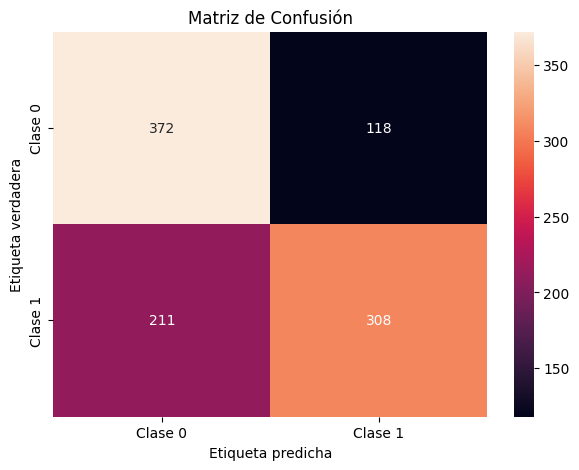

In [166]:
# Creo una matriz de confucion y contrapongo los target predicho con los target guardados para el test para ver el grado de prediccion del modelo.

c = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(7,5))

# Para este y el resto de los modelos, Clase 0 sera no le gusto el tema, Clase 1 si le gusto el tema.
sns.heatmap(c, annot=True, fmt='g', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Etiqueta predicha')
plt.ylabel('Etiqueta verdadera')
plt.title('Matriz de Confusión')
plt.show()

## Validacion Simple
## Validacion K-fold
## F1 Score
## Recal
## Grid Search
## Random Search





In [167]:
def validaciones(x, y,y_train, y_predic, y_test, modelo ):
  accuracy = accuracy_score(y_test, y_predic)
  precision = precision_score(y_test, y_predic)

  scores = cross_val_score(modelo, x, array_1d, cv=7)
  recall = recall_score(y_test, y_predic)
  f1 = f1_score(y_test, y_predic)
  parametros = {'n_neighbors': list(range(1, 31)), 'weights': ['uniform', 'distance']}



  print('Exactitud:', accuracy)
  print("Scores de validación cruzada:", scores)
  print("Media de los scores:", scores.mean())
  print("Desviación estándar de los scores:", scores.std())
  print('Recall:', recall)
  print('F1 Score:', f1)
  print(f'La precisión del modelo es: {precision}')
  print('***************************')

##### Esta funcion muy simple y hasta rustica, solo muestra los resultados del modelo medida en las metricas
Validacion Simple
Validacion K-fold
F1 Score
Recal

In [168]:
validaciones(x, y,y_train, y_pred, y_test, clasificadorKNN)

parametros = {'n_neighbors': list(range(1, 31)), 'weights': ['uniform', 'distance']}

y_train_1d = y_train.values.ravel()
y_test_1d = y_test.values.ravel()
grid = GridSearchCV(clasificadorKNN, parametros, cv=5, scoring='accuracy')
grid.fit(X_train, y_train_1d)

print('Mejores parámetros encontrados por Grid Search:', grid.best_params_)


random = RandomizedSearchCV(clasificadorKNN, parametros, cv=5, scoring='accuracy', n_iter=10, random_state=42)
random.fit(X_train, y_train_1d)

print('Mejores parámetros encontrados por Random Search:', random.best_params_)


Exactitud: 0.6739345887016849
Scores de validación cruzada: [0.70242215 0.66319444 0.65277778 0.61111111 0.63194444 0.62847222
 0.63541667]
Media de los scores: 0.6464769731421981
Desviación estándar de los scores: 0.02766502768931172
Recall: 0.5934489402697495
F1 Score: 0.6518518518518519
La precisión del modelo es: 0.7230046948356808
***************************
Mejores parámetros encontrados por Grid Search: {'n_neighbors': 17, 'weights': 'distance'}
Mejores parámetros encontrados por Random Search: {'weights': 'distance', 'n_neighbors': 17}


**Precisión:** El modelo tiene una precisión de 0.672, lo que significa que está haciendo predicciones correctas aproximadamente el 67.2% del tiempo en el conjunto de prueba.

**Validación cruzada:** Los scores de validación cruzada varían entre 0.608 y 0.699, con una media de 0.644. Esto sugiere que el rendimiento del modelo es bastante consistente independientemente de cómo se dividen los datos, lo cual es una buena señal.

**Recall:** El recall del modelo es 0.588, lo que significa que está identificando correctamente el 58.8% de todas las instancias positivas. s este valor podría ser un área para mejorar si se necesitara minimzar los falsos negativos

**F1 Score:** El F1 Score d es 0.648. El puntaje F1 es una medida que combina la precisión y el recall en un solo número. Un puntaje F1 más alto indica un mejor equilibrio entre la precisión y el recall.

**Grid Search y Random Search**: ambos métodos de búsqueda de hiperparámetros llegaron a la misma conclusión, lo que sugiere que esta configuración es probablemente una buena elección el modelo, sin embargo hago la acotacion que cuando ingreso k = 17 los valores de exactitud bajan de 0.67 a 0.66.

#SVM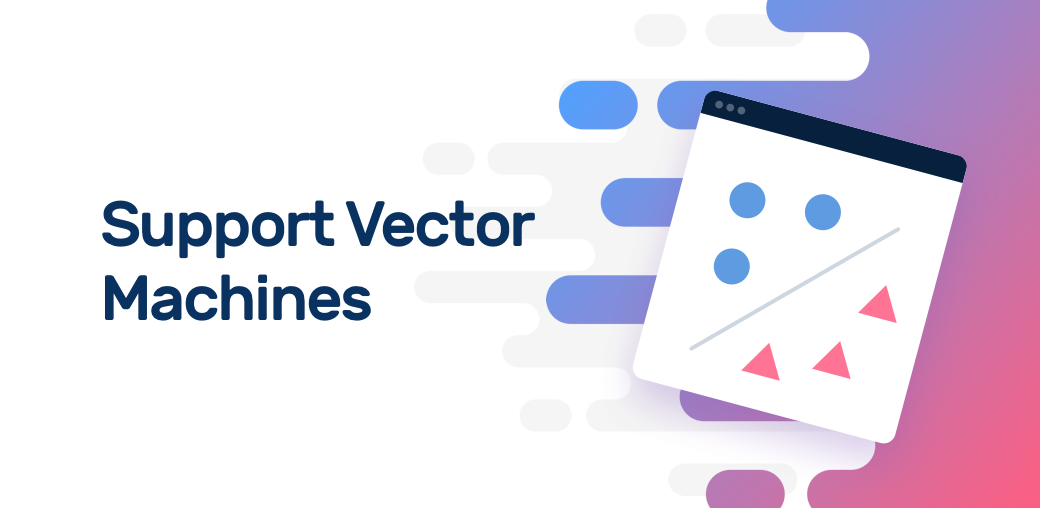

##Modelo


In [169]:
x= df_spoty[['instrumentalness','energy','loudness','speechiness','liveness','acousticness']]
y= df_spoty[['target']]
array_1d = y.values.ravel()

X_train, X_test, y_train, y_test= train_test_split(x, array_1d, test_size= 0.4, random_state=42)

# Ciclo for para determinar que kernels posee mas accuracy y precision

kernels = ['linear', 'rbf', 'poly']
for kernel in kernels:

    model = SVC(kernel=kernel)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print("Accuracy using {}:".format(kernel), accuracy_score(pred, y_test))
    print("Precisión using {}:".format(kernel), precision_score(y_test, pred))
    print('*********************')








Accuracy using linear: 0.6270136307311028
Precisión using linear: 0.6947368421052632
*********************
Accuracy using rbf: 0.6505576208178439
Precisión using rbf: 0.703125
*********************
Accuracy using poly: 0.6456009913258984
Precisión using poly: 0.7787610619469026
*********************


##### Con el modelo creado esta funcion me permite ver cual de los distintos kernels genera niveles mas altos de accuracy y precision. El mas alto seria poly, pero no puedo utilizarlo porque por motivos computacionales la maquina se me cuelga, es por ellos que voy a utilizar rbf.

Accuracy  0.7086223984142715
Precisión  0.7805486284289277


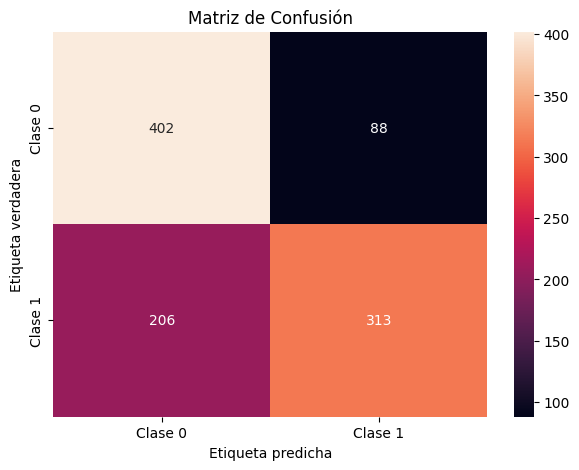

In [170]:
X_train, X_test, y_train, y_test= train_test_split(x, array_1d, test_size= 0.5, random_state=42)

# Creo otro modelo pero ahora comienzo a utilizar hiperparametros.

svc_model = SVC(kernel='rbf', C=100, gamma=0.1)
svc_model.fit(X_train, y_train)
svc_pred = svc_model.predict(X_test)
print("Accuracy ", accuracy_score(svc_pred, y_test))
print("Precisión ", precision_score(y_test, svc_pred))

c2 = confusion_matrix(y_test, svc_pred)


plt.figure(figsize=(7,5))

# Para este y el resto de los modelos, Clase 0 sera no le gusto el tema, Clase 1 si le gusto el tema.

sns.heatmap(c2, annot=True, fmt='g', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Etiqueta predicha')
plt.ylabel('Etiqueta verdadera')
plt.title('Matriz de Confusión')
plt.show()

##### En este caso probando con disntintos valores para c y para gamma. Cuando analize el modelo con RandomizedSearch mostro mejores resultados con un c = 100 y un gamma =0.1, es por eso de su eleccion.

## Validacion Simple
## Validacion K-fold
## F1 Score
## Recal
## Grid Search
## Random Search


In [171]:






validaciones(x,y,y_train, svc_pred, y_test,svc_model)


Exactitud: 0.7086223984142715
Scores de validación cruzada: [0.76816609 0.72222222 0.625      0.56944444 0.65277778 0.69097222
 0.67361111]
Media de los scores: 0.671741981106168
Desviación estándar de los scores: 0.06003379898673167
Recall: 0.603082851637765
F1 Score: 0.6804347826086956
La precisión del modelo es: 0.7805486284289277
***************************




**Exactitud (Accuracy):** El modelo tiene una exactitud de aproximadamente 0.71, lo que significa que el modelo predice correctamente el 71% de las veces.

**Validación cruzada (Cross-validation):** Los scores de validación cruzada varían entre 0.57 y 0.77, con una media de 0.67. Esto sugiere que el rendimiento del modelo puede variar cuando se expone a nuevos datos. La desviación estándar de los scores es de 0.06, lo que indica que hay cierta variabilidad en los resultados de la validación cruzada.

**Recall:** El recall del  modelo es de aproximadamente 0.60. Esto significa que de todas las clases positivas, el modelo es capaz de identificar correctamente el 60%.

**F1 Score:** El F1 Score  es de aproximadamente 0.68.

**Precisión (Precision):** La precisión es de aproximadamente 0.78. Esto significa que  predice una clase positiva, es correcto el 78% de las veces.

In [172]:

from sklearn import svm
parametros = {'C': [0.1, 1, 10],
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf']}

#
svc = svm.SVC()

# Creo el objeto GridSearchCV
grid = GridSearchCV(svc, parametros, refit=True)

# Ajusto el modelo a los datos
grid.fit(x, y.values.ravel())


print(grid.best_params_)

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}


##### El Grid Search muestra lo mencionado mas arriba. Un gamma= 1 y un C= 10.

In [173]:
parametros = {'C': np.logspace(-3, 2, 6),
              'gamma': np.logspace(-3, 2, 6),
              'kernel': ['rbf']}


svc = svm.SVC()

# Crear el objeto RandomizedSearchCV
random_search = RandomizedSearchCV(svc, parametros, n_iter=10, cv=5, refit=True)


random_search.fit(x, array_1d)


print(random_search.best_params_)

{'kernel': 'rbf', 'gamma': 0.01, 'C': 100.0}


#####Al ejecutar por primera vez RandomizerSearch el valor para gama fue de 0.1 y c=100, este es el valor final que le ingreso al modelo y me da numeros de accuracy y precision mas altos.

#Arbol de Decision
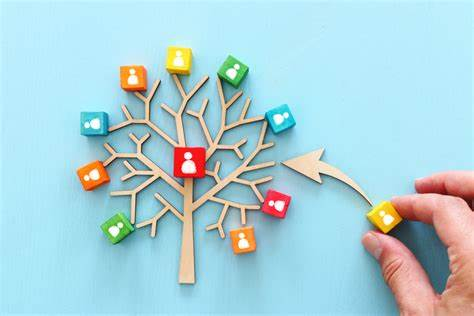


In [174]:
# Los datos seleccionados para completar el modelo son igaules en todos los casos,
# por lo tanto no voy a hacer mencion aqui, solo se veran includios en la divicion train, test.
X_train, X_test, y_train, y_test= train_test_split(x, array_1d, test_size= 0.5, random_state=42)


# Creo el modelo con 10 hojas para comenzar

dt_modelo = tree.DecisionTreeClassifier(max_leaf_nodes=30)

In [175]:
# Entreno el modelo.

dt_modelo.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=30)

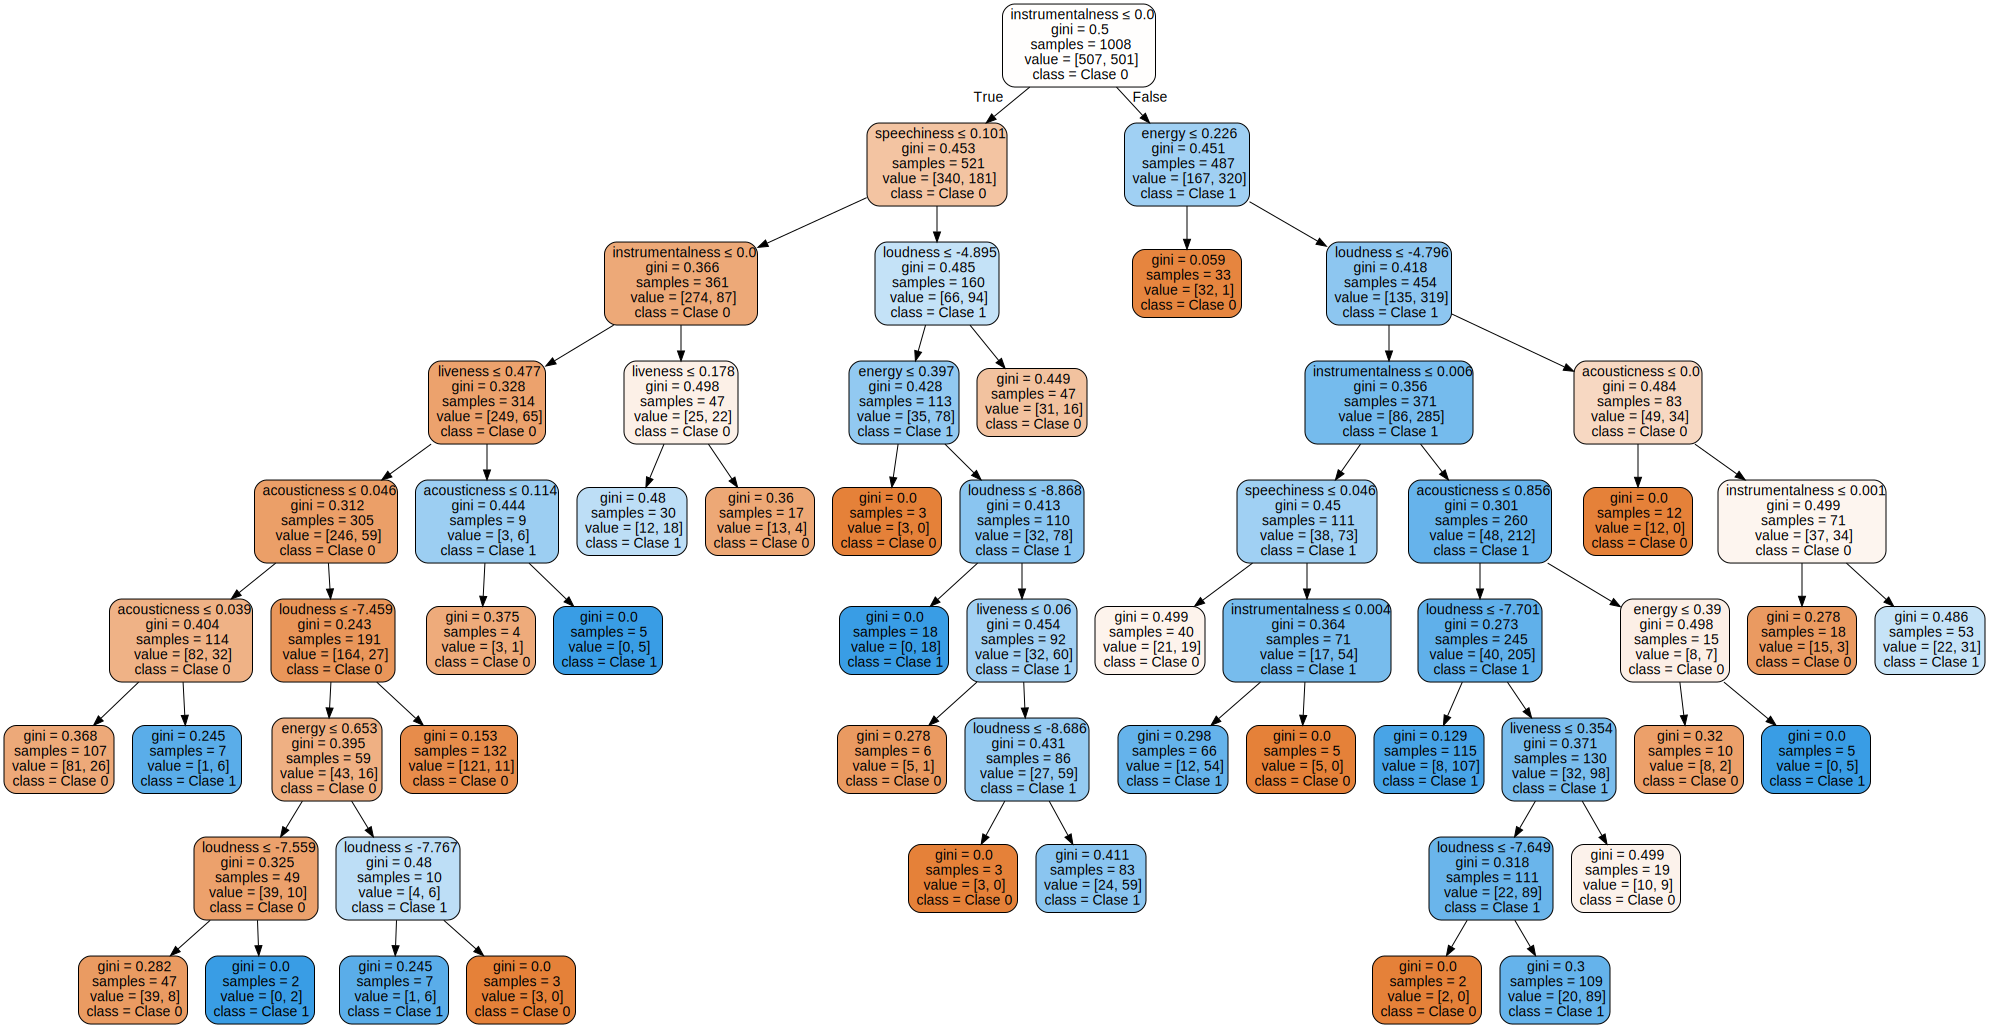

In [176]:
# Un grafico que nos muestra el modelo.

dot_data = tree.export_graphviz(dt_modelo, out_file=None,
                        feature_names = X_train.columns.values,
                        class_names = ["Clase 0","Clase 1"],
                        filled = True, rounded = True,
                        special_characters = True,leaves_parallel = False)


graph = graphviz.Source(dot_data)
graph

In [177]:
# Esta funcion muestra el accuracy promedio.
dt_modelo.score(X_test,y_test )

0.6927651139742319

### Matriz de Confusión

Número de errores de clasificación : 310


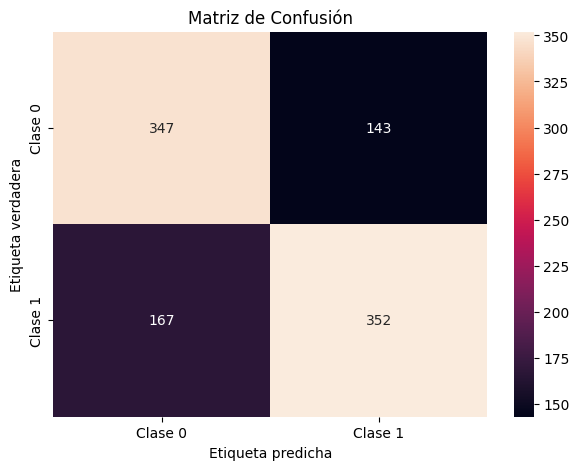

In [178]:

# Creao la matriz


# Genero las predicciones del modelo
dt_pred = dt_modelo.predict(X_test)


print("Número de errores de clasificación : %d" % (y_test != dt_pred).sum())
c3 = confusion_matrix(y_test, dt_pred)


plt.figure(figsize=(7,5))
sns.heatmap(c3, annot=True, fmt='g', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Etiqueta predicha')
plt.ylabel('Etiqueta verdadera')
plt.title('Matriz de Confusión')
plt.show()

#####Con lo visto en el test de accuracy y en la matriz de confucion, aun existe espacio para mejorar el modelo. Voy a realizar el resto de las mediciones y en base al resultado de estas luego se modifican los hiperparametros del modelo en cuestion para una mejor performance.


### Validacion Simple
### Validacion K-fold
## F1 Score
## Recal
## Grid Search
## Random Search

In [179]:
# Utilizo la funcion creada para obtener metricas, esta solo muestra asi que con llamarla es suficiente.

validaciones(x,y,y_train, dt_pred, y_test,dt_modelo)

Exactitud: 0.6927651139742319
Scores de validación cruzada: [0.75432526 0.69444444 0.62152778 0.69097222 0.65625    0.68055556
 0.70138889]
Media de los scores: 0.6856377354863515
Desviación estándar de los scores: 0.037931599886115414
Recall: 0.6782273603082851
F1 Score: 0.6942800788954635
La precisión del modelo es: 0.7111111111111111
***************************


In [180]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 3, 4, 5],
    'min_samples_split': [2, 3, 4]
}


# Creamos el modelo de árbol de decisión
dtc = DecisionTreeClassifier()

# Creamos el objeto GridSearchCV
grid_search = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=5)

# Ajustamos el modelo a los datos
grid_search.fit(X_train, y_train)

# Imprimimos los mejores parámetros encontrados
print(grid_search.best_params_)

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2}


#####Con esto resultados realizare modificaciones al modelo original y veremos los resultados.


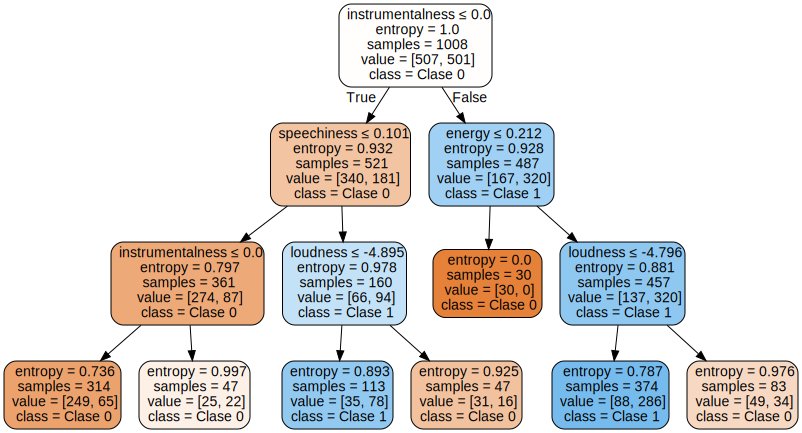

In [181]:
dt_modelo = tree.DecisionTreeClassifier(max_leaf_nodes=30,min_samples_split=2,criterion='entropy',max_depth=3)

dt_modelo.fit(X_train, y_train)


dot_data = tree.export_graphviz(dt_modelo, out_file=None,
                        feature_names = X_train.columns.values,
                        class_names = ["Clase 0","Clase 1"],
                        filled = True, rounded = True,
                        special_characters = True,leaves_parallel = False)


graph = graphviz.Source(dot_data)
graph

In [182]:
dt_modelo.score(X_test,y_test )

0.7264618434093162

#####Con estos nueva configuracion de Hiperparametros el modelo presenta un accuracy mas elevado. Podemos volver a usar la funcion validaciones para ver el resto.


In [183]:
# Nuevas predicciones.

dt_pred2 = dt_modelo.predict(X_test)

In [184]:
# Nuevos resultados.

validaciones(x,y,y_train, dt_pred2, y_test,dt_modelo)



Exactitud: 0.7264618434093162
Scores de validación cruzada: [0.75086505 0.73958333 0.51736111 0.66319444 0.67708333 0.74652778
 0.68402778]
Media de los scores: 0.6826632613829846
Desviación estándar de los scores: 0.07531542101137785
Recall: 0.6936416184971098
F1 Score: 0.7228915662650603
La precisión del modelo es: 0.7547169811320755
***************************


**Exactitud (Accuracy):** El modelo tiene una exactitud de aproximadamente el 72.6%. Esto significa que predice correctamente el 72.6% de las veces. Podría considerarse bastante bueno. Sin embargo, la exactitud por sí sola puede ser engañosa, especialmente si las clases están desequilibradas.

**Validación cruzada (Cross-validation):** Los scores de validación cruzada varían entre aproximadamente 0.52 y 0.75, con una media de 0.68 y una desviación estándar de 0.075. Esto sugiere que el modelo tiene un rendimiento bastante consistente a través de diferentes subconjuntos de tus datos.

**Recall:** El recall del modelo es de aproximadamente 0.69. Esto significa que de todas las instancias positivas, el modelo es capaz de identificar el 69% de ellas.

**F1 Score:** El F1 score  es de aproximadamente 0.72.

**Precisión: **La precisión del modelo es de aproximadamente 0.75. Esto significa que cuando el modelo predice una instancia positiva, es correcto el 75% de las veces.

##### Para visualizar mejor, podemos generar una nueva Matriz de Confucion.

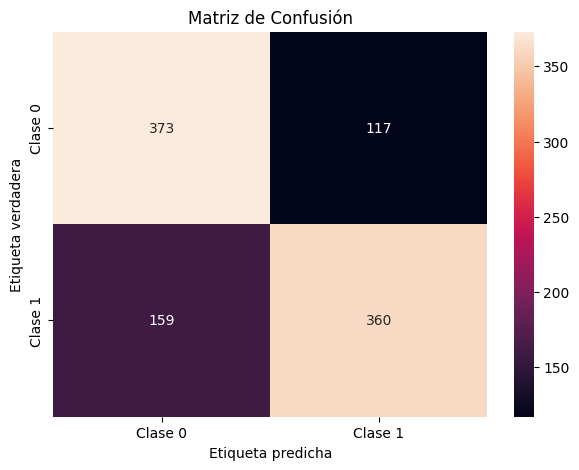

In [185]:
c4 = confusion_matrix(y_test, dt_pred2)


plt.figure(figsize=(7,5))
sns.heatmap(c4, annot=True, fmt='g', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Etiqueta predicha')
plt.ylabel('Etiqueta verdadera')
plt.title('Matriz de Confusión')
plt.show()

#####Se observa la mejoria. Podemos probar con Random Search para seguir buscando un mejor modelo.


In [186]:
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': randint(1, 5),
    'min_samples_split': randint(2, 5)
}

# Creamos el modelo de árbol de decisión
dtc = DecisionTreeClassifier()


random_search = RandomizedSearchCV(estimator=dtc, param_distributions=param_dist, cv=5, n_iter=100, random_state=0)

# Ajustamos el modelo a los datos
random_search.fit(X_train, y_train)

# Imprimimos los mejores parámetros encontrados
print(random_search.best_params_)

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2}


#####Obtenemos el mismo resultado que con Grid Search, por lo tanto dejamos la evaluacion en este punto.

#Bayes (Naive Bayes)
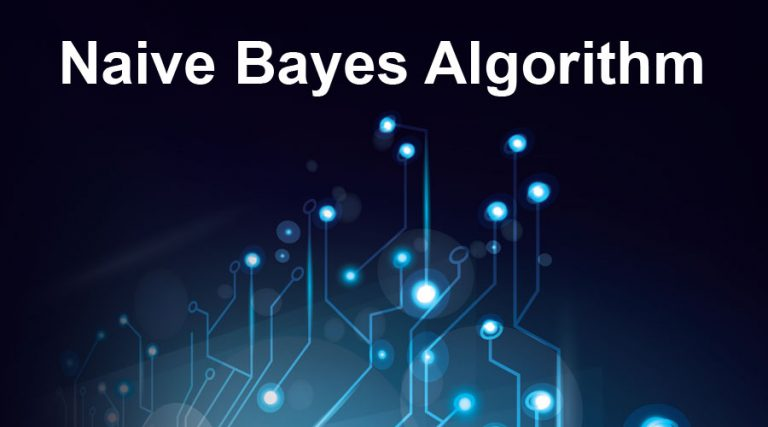

###Modelo

In [187]:
# Creo el objeto

clf_modelo = GaussianNB()

# Lo entreno.


clf_modelo.fit(X_train,y_train)

# Creo predicciones.
clf_pred = clf_modelo.predict(X_test)



In [188]:
# Por ultimo con la funcion classification_report observo primeros resultados.
print( classification_report(y_test, clf_pred))
print('******************************')


              precision    recall  f1-score   support

           0       0.62      0.71      0.66       490
           1       0.69      0.59      0.63       519

    accuracy                           0.65      1009
   macro avg       0.65      0.65      0.65      1009
weighted avg       0.65      0.65      0.65      1009

******************************


###Matriz de Confucion.

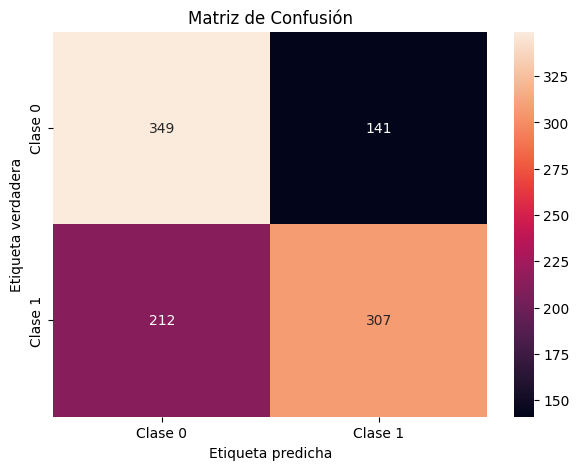

In [189]:
c5 = confusion_matrix(y_test, clf_pred)


plt.figure(figsize=(7,5))
sns.heatmap(c5, annot=True, fmt='g', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Etiqueta predicha')
plt.ylabel('Etiqueta verdadera')
plt.title('Matriz de Confusión')
plt.show()

### Validacion Simple
### Validacion K-fold
## F1 Score
## Recal
## Grid Search
## Random Search

In [190]:
# Tambien puedo usar la funcion creada para comenzar a analizar esto.
validaciones(x,y,y_train, clf_pred, y_test,clf_modelo)

Exactitud: 0.6501486620416254
Scores de validación cruzada: [0.53979239 0.57291667 0.48263889 0.50347222 0.65277778 0.52430556
 0.55208333]
Media de los scores: 0.5468552617125282
Desviación estándar de los scores: 0.05139526529608934
Recall: 0.5915221579961464
F1 Score: 0.6349534643226473
La precisión del modelo es: 0.6852678571428571
***************************


**Exactitud (Accuracy):** El modelo genera  una exactitud de aproximadamente el 65%. Esto significa que realiza una prediccion correcta en el  65% de las veces.

**Validación cruzada (Cross-validation):** Los scores de validación cruzada varían entre aproximadamente 0.48 y 0.65, con una media de 0.55 y una desviación estándar de 0.051. Esto sugiere que el modelo tiene un rendimiento bastante consistente a través de diferentes subconjuntos de tus datos, pero la variación es algo a tener en cuenta.

**Recall:** El recall del modelo es de aproximadamente 0.59. Esto significa que de todas las instancias positivas, el modelo es capaz de identificar el 59% de ellas.

**F1 Score:** El F1 score  es de aproximadamente 0.63.

**Precisión:** La precisión del modelo es de aproximadamente 0.69. Esto significa que cuando el modelo predice una instancia positiva, es correcto el 69% de las veces.


*********************************************


El algoritmo Gaussian Naive Bayes a menudo se usa sin ajuste de parámetros.

Para obtener diferentes resultados o mejorar el rendimiento del modelo puedo considerar las siguientes estrategias:

**Preprocesamiento de los datos:**  Podría intentar limpiar los datos eliminando o imputando valores perdidos, eliminando características irrelevantes o ruidosas, o creando nuevas características que podrían ser útiles para la predicción.

**Selección de características:** Aunque Naive Bayes asume que todas las características son independientes, en la práctica, esto rara vez es cierto. Podría intentar seleccionar un subconjunto de características que sean lo más independientes posible para mejorar el rendimiento de tu modelo.

**Prueba diferentes variantes de Naive Bayes:** Hay varias variantes del algoritmo Naive Bayes, como Multinomial Naive Bayes y Bernoulli Naive Bayes. Cada uno de estos es adecuado para diferentes tipos de datos, por lo que podrías intentar diferentes variantes para ver cuál funciona mejor con tus datos.

En este caso considero que usar otra variante del algoritmo seria interesante, asi que voy a crear objetos con **Multinomial Naive Bayes y Bernoulli Naive Bayes** y luego comparar los resultados.

Ahora el algoritmo **Multinomial Naive Bayes** no puede manejar valores negativos en los datos de entrada. Este modelo está diseñado para trabajar con datos de conteo, por lo que espera que todos los valores de entrada sean no negativos y el data set brindado posee en alguna de sus columnas numero negativos. Esto puede ser solucionable, pero elegi solo utilizar **Bernoulli Naive Bayes** y asi poder comparar.


# Bernoulli Naive Bayes
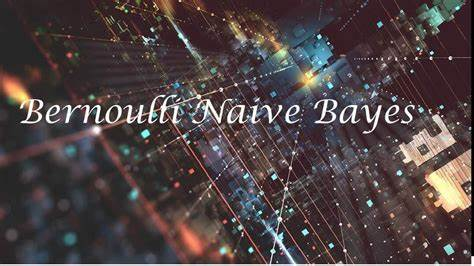

In [191]:
# Creamos el modelo Bernoulli Naive Bayes
bnb = BernoulliNB()

# Ajustamos el modelo a los datos de entrenamiento
bnb.fit(X_train, y_train)

# Hacemos predicciones en los datos de prueba
Bernoulli_pred = bnb.predict(X_test)

# Imprimimos el número de errores de clasificación y puedo comparar entre ambos modelos.
print("Número de errores de clasificación Bernoulli Naive Bayes: %d" % (y_test != Bernoulli_pred).sum())
print("Número de errores de clasificación Gaussian Naive Bayes: %d" % (y_test != clf_pred).sum())

Número de errores de clasificación Bernoulli Naive Bayes: 408
Número de errores de clasificación Gaussian Naive Bayes: 353




#####Aca ya podemos ver que el modelo **Bernoulli Naive Bayes** tiene mas errores por clasificacion que el metodo **Gaussian Naive Bayes**.

### Matriz de Confusion.

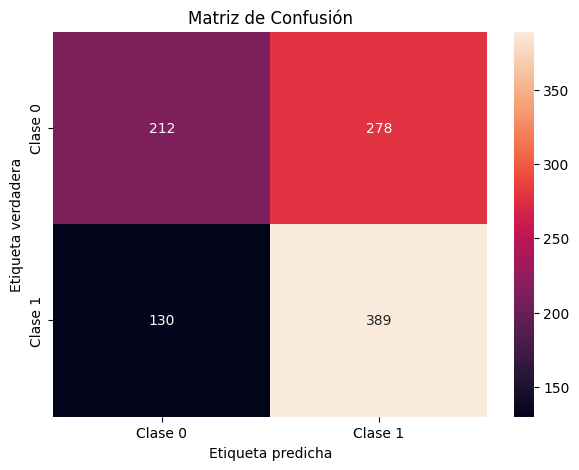

In [192]:
c6 = confusion_matrix(y_test, Bernoulli_pred)


plt.figure(figsize=(7,5))
sns.heatmap(c6, annot=True, fmt='g', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Etiqueta predicha')
plt.ylabel('Etiqueta verdadera')
plt.title('Matriz de Confusión')
plt.show()

###Validacion Simple
###Validacion K-fold
###F1 Score
###Recal

In [193]:
validaciones(x,y,y_train, Bernoulli_pred, y_test,bnb)

Exactitud: 0.595639246778989
Scores de validación cruzada: [0.65051903 0.74305556 0.51388889 0.52777778 0.52430556 0.71875
 0.57291667]
Media de los scores: 0.6073162107980448
Desviación estándar de los scores: 0.08931346651256336
Recall: 0.7495183044315993
F1 Score: 0.6559865092748736
La precisión del modelo es: 0.5832083958020989
***************************


#####En definitva al comparar ambos modelos el **Gaussian Naive Bayes** obtuvo mejores resultados.

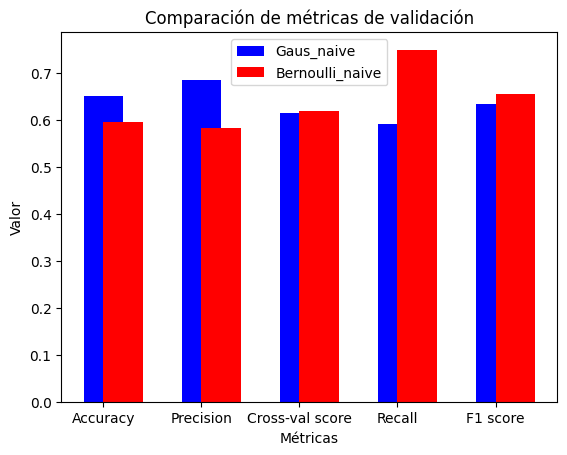

In [194]:
#Esta es una nueva version de la funcion realizada arriba que no regresa nada solo mostraba, en este caso la modifique para que
# tenga un regreso de datos los cuales utilizo para realizar un grafico. La idea es poder ver de forma mas simple las
# diferencia que encontre entre los dos modelos Bayes Naives.
# Una aclaracion extra: no se porque motivo la funcion cuando se la ejecuta por segunda vez no funciona. Detecta un error en la linea de scores
# pero si se ejecuta todo el entorno de ejecucion nuevamente esto se soluciona y se puede observar el grafico. Aun no detecte el error, dejo la aclaracion.


def validaciones_return(x, y, y_train, y_predic, y_test, modelo):
    accuracy = accuracy_score(y_test, y_predic)
    precision = precision_score(y_test, y_predic)
    scores = cross_val_score(modelo, X_train, y_train, cv=7)
    recall = recall_score(y_test, y_predic)
    f1 = f1_score(y_test, y_predic)
    return accuracy, precision, scores.mean(), recall, f1


gaus_naive = validaciones_return(x, y, y_train, clf_pred, y_test, clf_modelo)
bernoulli_naive = validaciones_return(x, y, y_train, Bernoulli_pred, y_test, bnb)


labels = ['Accuracy', 'Precision', 'Cross-val score', 'Recall', 'F1 score']
x = range(len(labels))

plt.bar(x, gaus_naive, width=0.4, label='Gaus_naive', color='b', align='center')
plt.bar(x, bernoulli_naive, width=0.4, label='Bernoulli_naive', color='r', align='edge')

plt.xlabel('Métricas')
plt.ylabel('Valor')
plt.title('Comparación de métricas de validación')
plt.xticks(x, labels)
plt.legend()
plt.show()

#####Como se puede ver el modelo Gaussian Naive Bayes presenta mejores metricas en Accuracy y Precision pero no asi en Cross Validation, Recall y F1 Score, donde el modelo Bernoulli Naive Bayes resulto mas eficiente.

#Modelo de Ensamble.
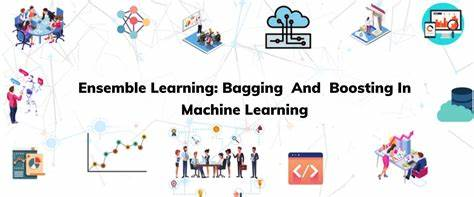

###Modelo.

In [195]:
modelo_ensamble = VotingClassifier(estimators=[
    ('arbol', dt_modelo),
    ('gauss', clf_modelo),
    ('bernoulli', bnb),
    ('knn', clasificadorKNN),
    ('svc', svc_model)
])

# Ajusto el modelo de ensamble a los datos de entrenamiento
modelo_ensamble.fit(X_train, y_train)

# Realizo predicciones en tus datos de prueba
ensamble_pred = modelo_ensamble.predict(X_test)



#####Este código crea un modelo de ensamble que combina las predicciones de los modelos arriba creados . Luego, ajusta el modelo de ensamble a los datos de entrenamiento y hace predicciones en los datos de prueba.

###Matriz de Confusion.

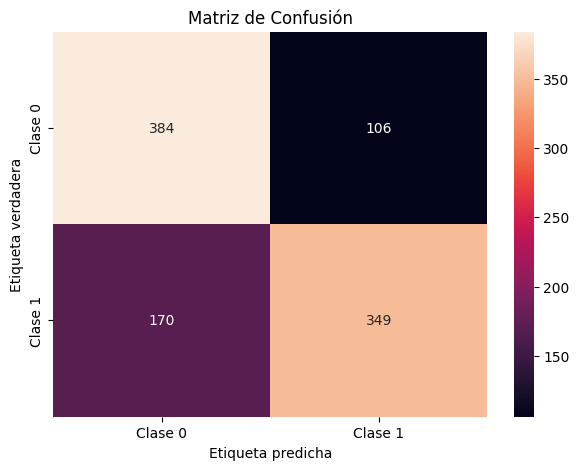

In [196]:
c7 = confusion_matrix(y_test, ensamble_pred)


plt.figure(figsize=(7,5))
sns.heatmap(c7, annot=True, fmt='g', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Etiqueta predicha')
plt.ylabel('Etiqueta verdadera')
plt.title('Matriz de Confusión')
plt.show()

###Validacion Simple
###Validacion K-fold
###F1 Score
###Recal

In [197]:
accuracy = accuracy_score(y_test, ensamble_pred)
precision = precision_score(y_test, ensamble_pred)

scores = cross_val_score(modelo_ensamble, X_train, y_train, cv=7)
recall = recall_score(y_test, ensamble_pred)
f1 = f1_score(y_test, ensamble_pred)
parametros = {'n_neighbors': list(range(1, 31)), 'weights': ['uniform', 'distance']}



print('Exactitud:', accuracy)
print("Scores de validación cruzada:", scores)
print("Media de los scores:", scores.mean())
print("Desviación estándar de los scores:", scores.std())
print('Recall:', recall)
print('F1 Score:', f1)
print(f'La precisión del modelo es: {precision}')
print('***************************')


Exactitud: 0.7264618434093162
Scores de validación cruzada: [0.66666667 0.68055556 0.74305556 0.71527778 0.6875     0.6875
 0.73611111]
Media de los scores: 0.7023809523809523
Desviación estándar de los scores: 0.027132528434875697
Recall: 0.6724470134874759
F1 Score: 0.7166324435318275
La precisión del modelo es: 0.7670329670329671
***************************


#####Sin necesidad de entrar a evaluar cada una de las metricas considero que el desempeño de este ensamble es mayor al de los modelos tomados de forma individial.

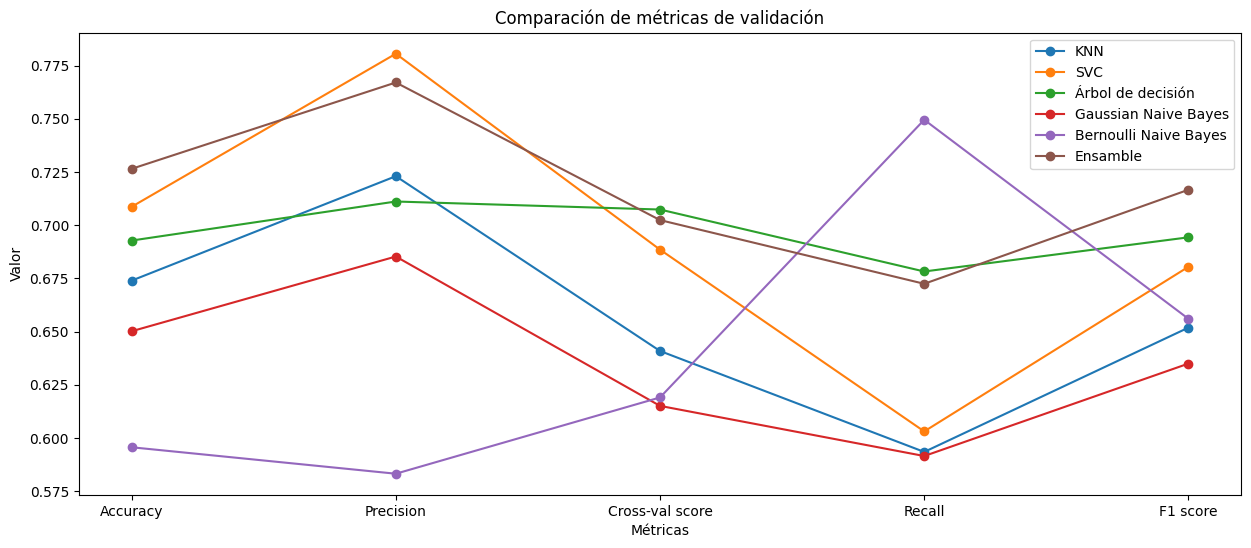

In [211]:
# Por ultimo y para tener una comparacion visual del resultado creo un diccionario con los modelos, que tiene en forma de tupla el nombre del modelo y sus y_pred.
# Para luego con un ciclo for recorrer el dic y utilizando la funcion validaciones_return crear un grafico,
modelos = {
    'KNN': (clasificadorKNN, y_pred),
    'SVC': (svc_model, svc_pred),
    'Árbol de decisión': (dt_modelo, dt_pred),
    'Gaussian Naive Bayes': (clf_modelo, clf_pred),
    'Bernoulli Naive Bayes': (bnb, Bernoulli_pred),
    'Ensamble': (modelo_ensamble, ensamble_pred)
}


metricas = ['Accuracy', 'Precision', 'Cross-val score', 'Recall', 'F1 score']


plt.figure(figsize=(15, 6))


for nombre_modelo, (modelo, y_predic) in modelos.items():

    resultados = validaciones_return(X_train, y_train, y_train, y_predic, y_test, modelo)


    plt.plot(metricas, resultados, marker='o', label=nombre_modelo)


plt.legend()
plt.xlabel('Métricas')
plt.ylabel('Valor')
plt.title('Comparación de métricas de validación')
plt.show()